<a href="https://colab.research.google.com/github/rohandhunde/12_Mnist_image_Classification-Pytorch-/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.5.1+cu121
0.20.1+cu121




```
# This is formatted as code
```

# 1. Getting a Dataset

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True,
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True,
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.42MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

1.1 Shape of the data

```
# This is formatted as code
```



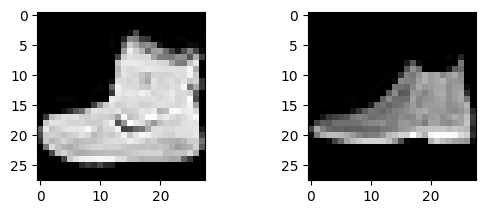

In [5]:
plt.subplot(2,2,1)
plt.imshow(train_data[0][0][0], cmap='gray')

plt.subplot(2,2,2)
plt.imshow(test_data[0][0][0], cmap='gray')

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

# 1.1 Input and output shapes of a computer vision model

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
class_names[label]

'Ankle boot'

Text(0.5, 1.0, 'Ankle boot')

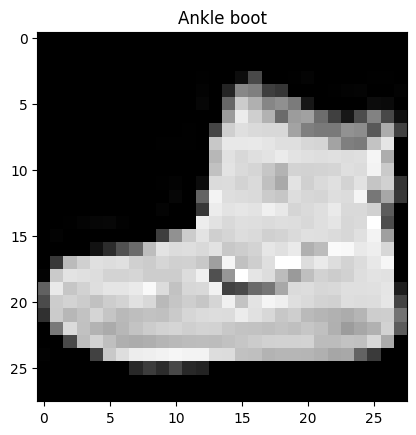

In [12]:
plt.imshow(image[0], cmap='gray')
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

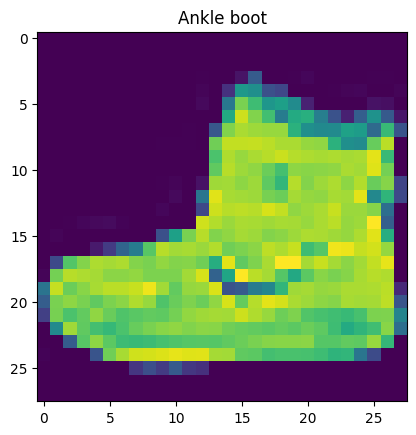

In [13]:
plt.imshow(image[0])
plt.title(class_names[label])

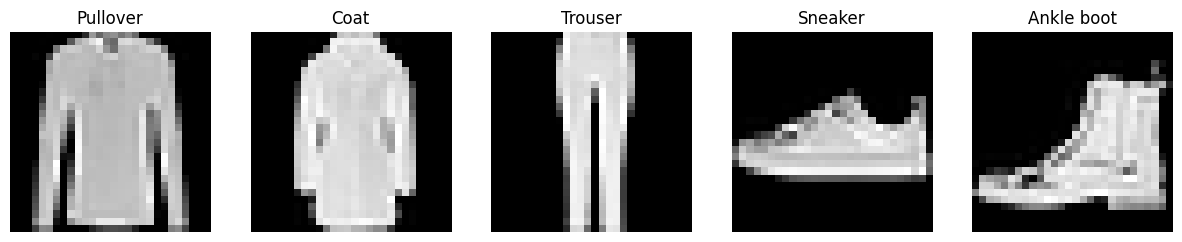

In [14]:
import random
import matplotlib.pyplot as plt

# Assuming train_data and class_names are already defined

# Get 5 unique random indices
random_indices = random.sample(range(len(train_data)), 5)

# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Iterate through the random indices and display images
for i, random_idx in enumerate(random_indices):
    image, label = train_data[random_idx]
    axes[i].imshow(image[0], cmap='gray')
    axes[i].set_title(class_names[label])
    axes[i].axis('off')  # Turn off axis ticks and labels

plt.show()

# 2. Prepare DataLoader

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn dataset into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)# <- number_of_workers = 2 The num_workers parameter controls how many CPU threads (workers) are spawned to load data in parallel during training.

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)# <- number_of_workers = 2 The num_workers parameter controls how many CPU threads (workers) are spawned to load data in parallel during training.

train_dataloader, test_dataloader

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cdba69a41d0>, <torch.utils.data.dataloader.DataLoader object at 0x7cdba8acd990>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [16]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
# Check out the what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


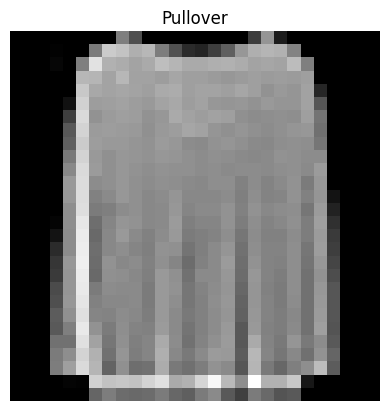

In [19]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: Build a baseline model

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(x.shape)

# output shape after using flatten
output = flatten_model(x)
print(output.shape)

print(f"shape before flattening: {x.shape}  -> [color_channels, heigh, width]")
print(f"shape after flattening: {output.shape}  -> [color_channels, heigh*width]")

torch.Size([1, 28, 28])
torch.Size([1, 784])
shape before flattening: torch.Size([1, 28, 28])  -> [color_channels, heigh, width]
shape after flattening: torch.Size([1, 784])  -> [color_channels, heigh*width]


In [21]:
print(x), print(output)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0157, 0.0000, 0.2392, 0.4588, 0.7176, 0.8118,
          0.8078, 0.8353, 0.8000, 0.8196, 0.7765, 0.8118, 0.6275, 0.6980,
          0.0000, 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0078, 0.0118, 0.0000, 0.0784, 0.6078, 0.8784, 0.8980,
          0.9176, 0.9216, 0.9569, 0.9098, 0.8824, 0.9216, 0.6353, 0.3059,
          0.0000, 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.5020, 0.8196, 0.8510,
          0.8667, 0.7765, 0.7569, 0.8863, 0.8824, 0.8980, 0.7137, 0.4039,
          0.0000, 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.7804, 0.8627, 0.7059,
          0.4667, 0.4275, 0.3686, 0.4941, 0.7804, 0.9059,

(None, None)

In [22]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
torch.manual_seed(42)
dummy_x = torch.rand(size=(64, 1, 28, 28))
model_0(dummy_x)

tensor([[ 0.1813, -0.3193,  1.3691,  0.9185, -0.1709, -1.0997, -0.3299,  1.6366,
         -0.0506, -0.6301],
        [-0.4516,  0.8411,  0.9107, -1.3592,  0.1957,  0.3044, -0.7906,  0.1414,
         -0.7352,  0.2019],
        [-0.1695, -0.0031,  1.0184,  0.9335,  0.2591,  0.8857, -0.5853,  0.5086,
         -0.4174, -0.5672],
        [ 1.1775,  1.0962,  0.8174, -0.4832,  1.6177,  1.0467, -0.4865,  0.5285,
         -0.1905,  0.8807],
        [ 0.9195, -0.1074, -1.1882,  0.0464, -0.2602,  0.4225,  0.0083, -0.3225,
         -0.6650, -0.3440],
        [ 0.3489, -0.8205, -0.0385,  0.5377,  1.8037,  1.6808, -0.2349, -0.7085,
          0.0145, -1.2598],
        [-1.1052, -1.2354,  0.9184,  0.0667,  1.3134,  0.9424,  1.7224, -0.4596,
          0.1907,  0.4120],
        [-0.6839,  0.0221,  1.0478, -1.0945,  1.1105,  0.9232,  1.0275, -0.1860,
         -0.8912,  1.1185],
        [ 0.7829,  0.6067, -0.9735,  0.3528,  1.5706, -0.4519, -0.8325,  1.4092,
          0.7138, -0.0277],
        [ 1.1889, -

In [25]:
loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

# 3.1 Setup loss, optimizer and evaluation metrics
1. Classification Problems:
Loss Function: Cross-Entropy Loss
Optimizer: Adam
Evaluation Metrics:
Accuracy
Precision
Recall
F1-Score
AUC-ROC
2. Regression Problems:
Loss Function: Mean Squared Error (MSE)
Optimizer: Adam
Evaluation Metrics:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R²)
3. Binary Classification:
Loss Function: Binary Cross-Entropy
Optimizer: Adam
Evaluation Metrics:
Accuracy
Precision
Recall
F1-Score
AUC-ROC
4. Image Classification / CNNs:
Loss Function: Categorical Cross-Entropy Loss
Optimizer: Adam
Evaluation Metrics:
Accuracy
Precision
Recall
F1-Score
Confusion Matrix
5. Sequence Models / RNNs:
Loss Function: Cross-Entropy Loss (for classification), Mean Squared Error (MSE) (for regression)
Optimizer: Adam
Evaluation Metrics:
Accuracy (for classification)
Perplexity (for language models)
BLEU Score (for translation tasks)
ROUGE Score (for text summarization)
6. Unsupervised Learning (e.g., Autoencoders, Clustering):
Loss Function: Kullback-Leibler Divergence, Reconstruction Loss (MSE)
Optimizer: Adam
Evaluation Metrics:
Silhouette Score (for clustering)
Davies-Bouldin Index (for clustering)
Mean Squared Error (MSE) (for reconstruction tasks)
7. Generative Models (e.g., GANs):
Loss Function: Binary Cross-Entropy
Optimizer: Adam
Evaluation Metrics:
Inception Score
Fréchet Inception Distance (FID)
Visual Inspection (qualitative evaluation)


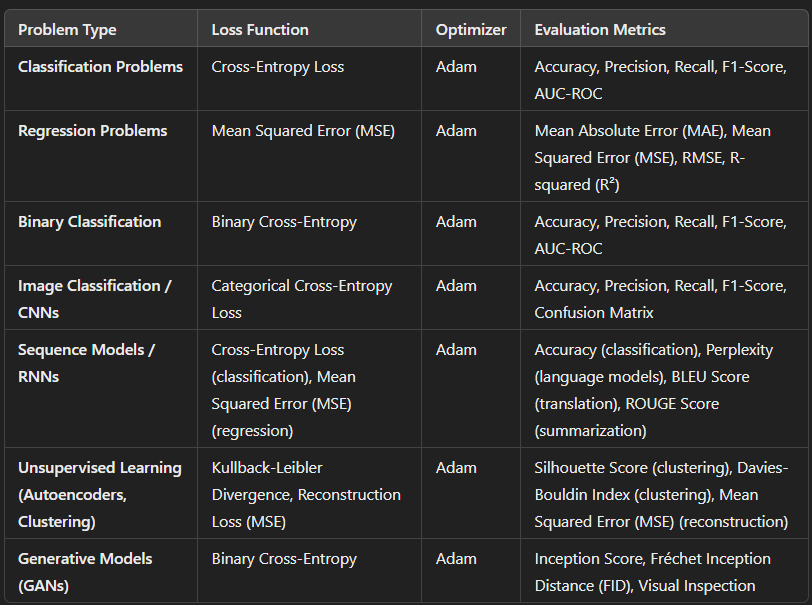

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [27]:
# import accuracy function from the helper function
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizers = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)


# 3.2 Creating a function to tome out expetiments

Two of the main things you'll often wanta to track are:
1. model' performance (loss and accuracy values etc)
2. How fast it runs


In [28]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """ print difftence between the start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [29]:
start_time = timer()
end_time = timer()

print_train_time(start = start_time,
                 end = end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


5.752300000949617e-05

In [30]:
start_time = timer()
end_time = timer()

print_train_time(start = start_time,
                 end = end_time,
                 device="gpu")

Train time on gpu: 0.000 seconds


4.50139999941257e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. print out what's hapenning.
5. Time it all (for fun)

In [31]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [32]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 28.429 seconds


### 4. Make predictions and get Model_0 result

In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic-code (for using gpu if there is one)

In [34]:
!nvedia-smi

/bin/bash: line 1: nvedia-smi: command not found


In [35]:
torch.cuda.is_available()

True

In [36]:
# setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Model 1: Buileinng better model with non-linearity

In [37]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_shape:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_shape),
        nn.ReLU(),
        nn.Linear(in_features=input_shape,
                  out_features=output_shape),
        nn.ReLU()
        )

model_1 = FashionMNISTModelV1(input_shape=784,
                               hidden_shape=10,
                               output_shape=10)

model_1.to(device)




FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [38]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [39]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape= len(class_names)).to(device)

### 6.1 Setups loss, Optimizer and evaluation metrics

In [40]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                                lr=0.1)

### 6.2 function training and evaluation/testing loops
let's create a function for:
* training loop - `train_steps()`
* test loop - `test_steps()`

In [41]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [42]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 39.406 seconds


In [43]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary"""

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.64519 | Train accuracy: 76.65%
Test loss: 0.68914 | Test accuracy: 75.03%

Epoch: 1
---------
Train loss: 0.62752 | Train accuracy: 77.09%
Test loss: 0.66747 | Test accuracy: 75.82%

Epoch: 2
---------
Train loss: 0.61555 | Train accuracy: 77.36%
Test loss: 0.64590 | Test accuracy: 76.36%

Train time on cuda: 32.295 seconds


In [44]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.645904004573822,
 'model_acc': 76.35782747603834}

In [45]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Model 2: Building a Convolution Neural Network (CNN)
# CNNs are also known ConvNets.
# CNN's are known for their capabilities to find patterns in visual data.

In [46]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channel= input_shape,
                  out_challensa=output_shape,
                  kernal_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channel= input_shape,
                  out_challensa=output_shape,
                  kernal_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=output_shape,
                  kernal_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channel=inputshap,
                  out_channels=output_shape,
                  kernal_size=3,
                  strides=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPoole2d(kernal_size=2,
                      padding=1)
    )




In [47]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [48]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2.to(device)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 7.1 Stepping through `nn.Conv2d()`




In [49]:
torch.manual_seed(42)

# creata a batch of image
images = torch.randn(size=(32,3,64,64))
test_image = image[0]
# plt.imshow(test_image.permute(1,2,0))
print(f"Image shape: {image.shape}")
print(f"Image batch shape: {test_image.shape}")



Image shape: torch.Size([1, 28, 28])
Image batch shape: torch.Size([28, 28])


In [50]:
test_image.shape

torch.Size([28, 28])

In [51]:
i

4

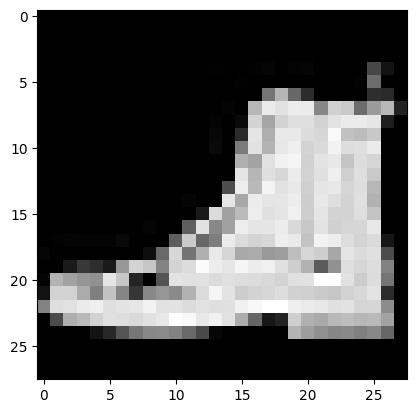

In [52]:
plt.imshow(image.squeeze(), cmap="gray")


In [53]:
# model_2(rand_image_tensor.unsqueeze(0).to(device))

In [54]:
rand_image_tensor = torch.randn(1, 28, 28)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [55]:
model2 = model_2(image.unsqueeze(0).to(device))


In [56]:
# torch.manual_seed(42)

# # Create a convolutional layer with same dimensions as TinyVGG
# # (try changing any of the parameters and see what happens)
# conv_layer = nn.Conv2d(in_channels=3,
#                        out_channels=10,
#                        kernel_size=(3,3),
#                        stride=1,
#                        padding=0) # also try using "valid" or "same" here

# # Pass the data through the convolutional layer
# conv_output = conv_layer(test_image.unsqueeze(0))
# conv_output

In [57]:
torch.__version__

'2.5.1+cu121'

# 7.2 Stepping through nn.MaxPool2d()

In [58]:
# # Print out original image shape without and with unsqueezed dimension
# print(f"Test image original shape: {test_image.shape}")
# print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# # Create a sample nn.MaxPoo2d() layer
# max_pool_layer = nn.MaxPool2d(kernel_size=2)

# # Pass data through just the conv_layer
# test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
# print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# # Pass data through the max pool layer
# test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
# print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

In [59]:
torch.manual_seed(42)
# creat a random tensor with similar number of dimension to out image
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor.shape)

 # create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(random_tensor)


# # pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



torch.Size([1, 1, 2, 2])
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# 7.3 Setup a loss function and optimizer for `model_2`

In [60]:
# Setup loss function/eval metrics/optimizers
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using out training and test functions


In [61]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 3
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.80986 | Train accuracy: 70.26%
Test loss: 0.40755 | Test accuracy: 85.37%

Epoch: 1
---------
Train loss: 0.37584 | Train accuracy: 86.34%
Test loss: 0.37704 | Test accuracy: 86.20%

Epoch: 2
---------
Train loss: 0.33429 | Train accuracy: 87.80%
Test loss: 0.34759 | Test accuracy: 87.56%

Train time on cuda: 34.112 seconds


In [62]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34759435057640076,
 'model_acc': 87.55990415335464}

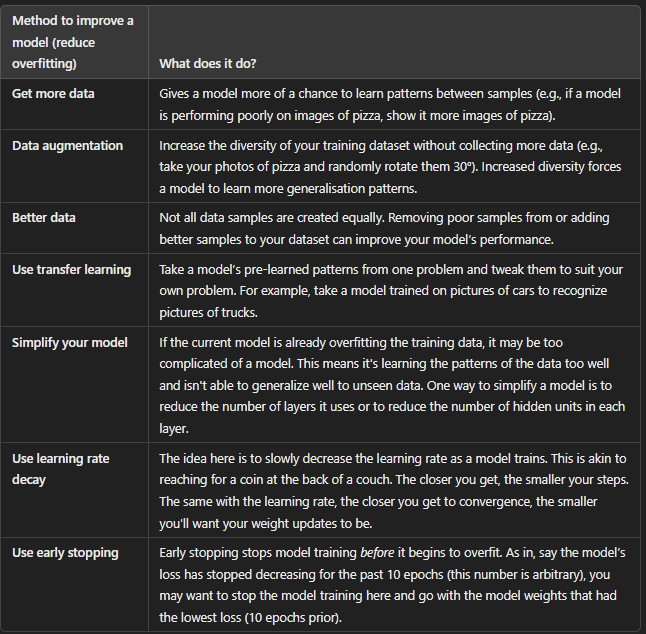

# 8. Compare model results and training time

In [63]:
model_1_results, model_2_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.645904004573822,
  'model_acc': 76.35782747603834},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.34759435057640076,
  'model_acc': 87.55990415335464})

In [64]:
import pandas as pd
df = pd.DataFrame([model_1_results, model_2_results])
df

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,0.645904,76.357827
1,FashionMNISTModelV2,0.347594,87.559904


In [65]:
import pandas as pd
compare_results = pd.DataFrame([
    model_1_results,
    model_2_results,
    model_0_results
])
print(compare_results)

            model_name  model_loss  model_acc
0  FashionMNISTModelV1    0.645904  76.357827
1  FashionMNISTModelV2    0.347594  87.559904
2  FashionMNISTModelV0    0.476639  83.426518


Text(0, 0.5, 'Value')

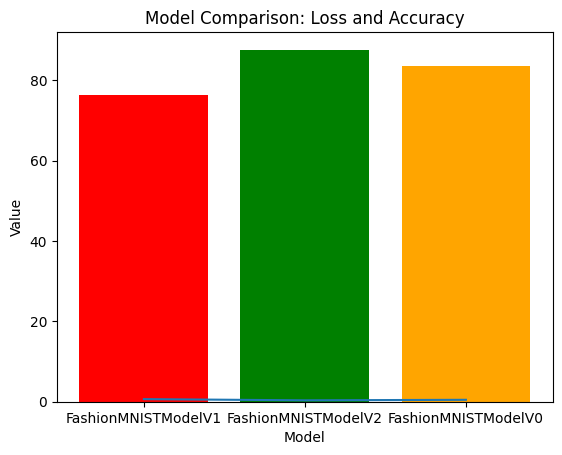

In [66]:
plt.plot(compare_results["model_name"], compare_results["model_loss"])
plt.bar(compare_results["model_name"], compare_results["model_acc"], color=["red", "green", "orange"])
plt.title("Model Comparison: Loss and Accuracy")
plt.xlabel("Model")
plt.ylabel("Value")

In [67]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV1,0.645904,76.357827,28.429270
1,FashionMNISTModelV2,0.347594,87.559904,32.295236
2,FashionMNISTModelV0,0.476639,83.426518,34.111889


Text(0, 0.5, 'Training Time')

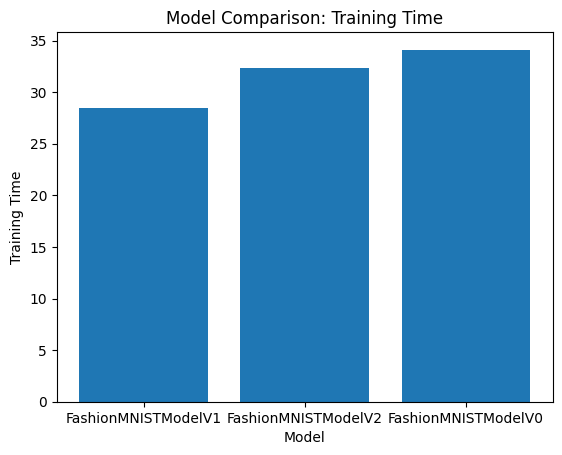

In [68]:
plt.bar(compare_results["model_name"], compare_results["training_time"])
plt.title("Model Comparison: Training Time")
plt.xlabel("Model")
plt.ylabel("Training Time")

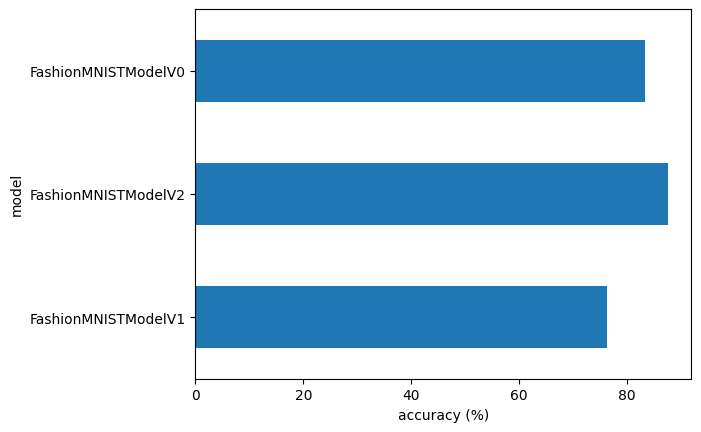

In [69]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### 9. Make and evaluate random predictions with best model

In [70]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [71]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [72]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.1398e-07, 1.7677e-10, 2.6306e-09, 6.0689e-10, 1.5068e-09, 9.9999e-01,
         5.6958e-07, 3.0236e-08, 1.7761e-06, 8.8516e-06],
        [3.8287e-02, 6.5183e-01, 5.4073e-04, 1.2400e-01, 1.6049e-01, 1.0394e-04,
         2.1627e-02, 1.1965e-04, 2.8790e-03, 1.2534e-04]])

In [73]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.1398e-07, 1.7677e-10, 2.6306e-09, 6.0689e-10, 1.5068e-09, 9.9999e-01,
         5.6958e-07, 3.0236e-08, 1.7761e-06, 8.8516e-06],
        [3.8287e-02, 6.5183e-01, 5.4073e-04, 1.2400e-01, 1.6049e-01, 1.0394e-04,
         2.1627e-02, 1.1965e-04, 2.8790e-03, 1.2534e-04]])

In [74]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [75]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

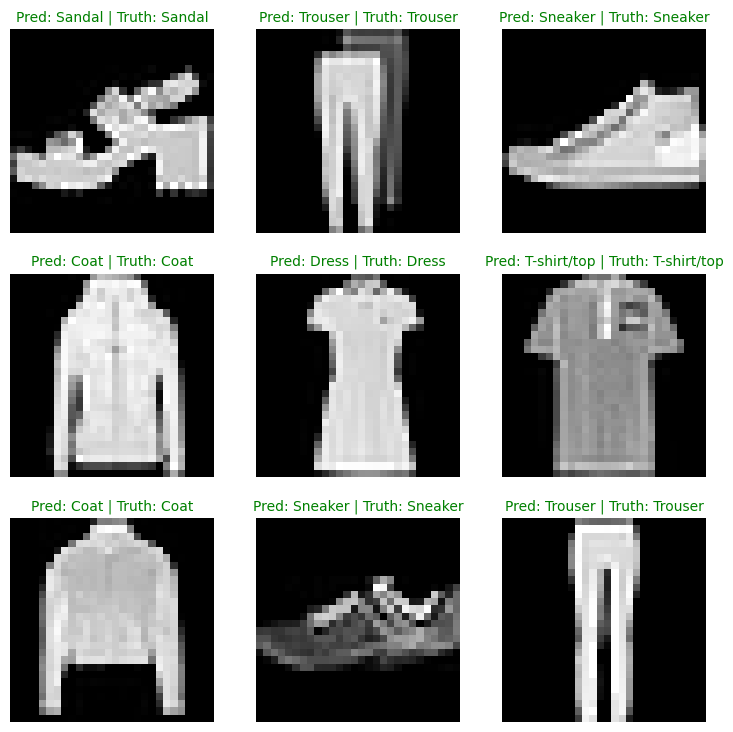

In [76]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

Text(0.5, 1.0, '5')

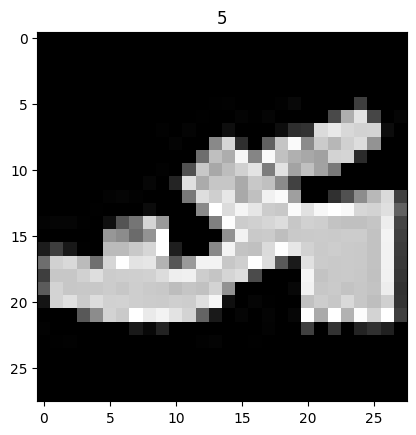

In [77]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(test_labels[0])

In [78]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.1398e-07, 1.7677e-10, 2.6306e-09, 6.0689e-10, 1.5068e-09, 9.9999e-01,
         5.6958e-07, 3.0236e-08, 1.7761e-06, 8.8516e-06],
        [3.8287e-02, 6.5183e-01, 5.4073e-04, 1.2400e-01, 1.6049e-01, 1.0394e-04,
         2.1627e-02, 1.1965e-04, 2.8790e-03, 1.2534e-04]])

In [79]:
torch.argmax(pred_probs[0])

tensor(5)

In [80]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

# 10. Making a confusion matrix for further prediction evaluation

In [81]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [82]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 16.7 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [83]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.3


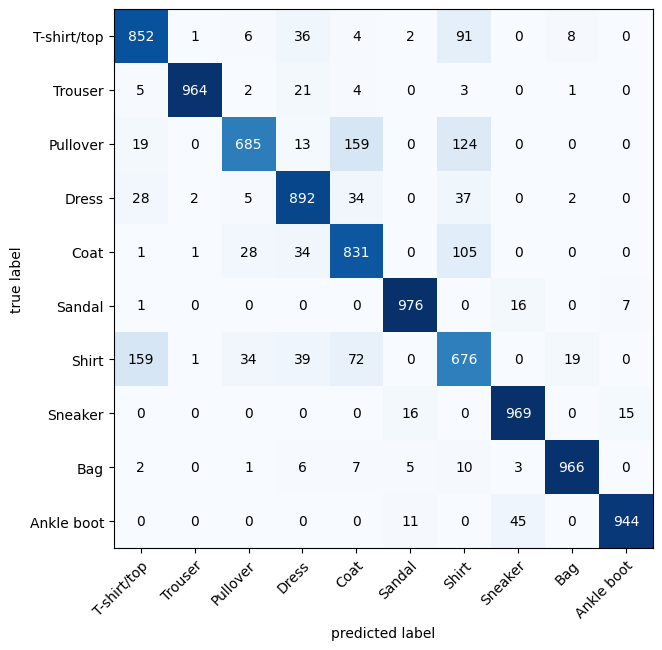

In [84]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

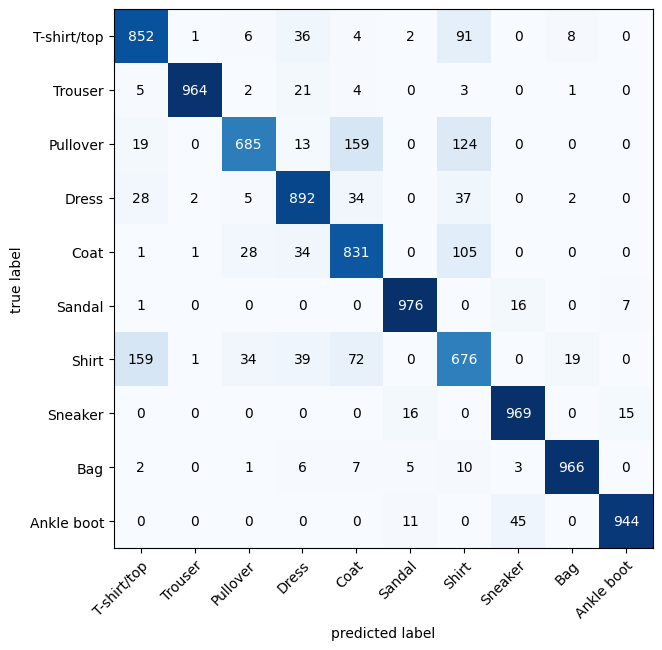

In [85]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# The task should be "multiclass" instead of "multitark"
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
# Remove this line as it's a duplicate initialization with incorrect parameters
# confmat = ConfusionMatrix(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Plot using mlxtend, providing the confusion matrix and class names
plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7));

# 11. Save and load best performing model

In [95]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [97]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-97-01e1a5266d0e>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [98]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34759435057640076,
 'model_acc': 87.55990415335464}

In [99]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34759435057640076,
 'model_acc': 87.55990415335464}

In [100]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)